# Project: Predicting Housing Prices Using Linear Regression

## Objectives

The purpose of this data analysis report is to perform linear regression analysis based on existing housing sale prices and related property information. The goal is to utilize the obtained linear regression model to predict the prices of houses with the following attributes:

Area: 6500 square feet, 4 bedrooms, 2 bathrooms, 2 stories, not located on the main road, no guest room, with a basement, equipped with a water heater, no air conditioning, 2 parking spaces, located in the city's preferred community, and with simple furnishings.

## Introduction

The dataset "house_price.csv" records transaction prices for over five hundred houses, along with relevant property information, including house area, number of bedrooms, number of bathrooms, number of stories, whether it is located on the main road, whether it has a guest room, and more.

The meaning of each column in `house_price.csv` is as follows:
- price: Sale price of the house
- area: House area in square feet
- bedrooms: Number of bedrooms
- bathrooms: Number of bathrooms
- stories: Number of stories
- mainroad: Whether it is located on the main road (yes/no)
- guestroom: Whether it has a guest room (yes/no)
- basement: Whether it has a basement (yes/no)
- hotwaterheating: Whether it has a water heater (yes/no)
- airconditioning: Whether it has air conditioning (yes/no)
- parking: Garage capacity in terms of the number of vehicles
- prefarea: Whether it is located in the city's preferred community (yes/no)
- furnishingstatus: Furnishing status (furnished, semi-furnished, unfurnished)
, unfurnished)

## Read Data

Import the necessary libraries for data analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the libraries needed for data analysis and use the `read_csv` function from Pandas to get the contents of the original data file `house_price.csv` into a DataFrame. Assign the DataFrame to the variable `original_house_price`.

In [2]:
original_house_price = pd.read_csv("house_price.csv")
original_house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Assessment and Cleaning

In this section, we will assess and clean the data contained in the `original_house_price` DataFrame established in the previous section.

This process will primarily focus on two aspects: structure and content, addressing the tidiness and cleanliness of the data.

Structural issues in the data refer to deviations from the three criteria: "each variable as a column, each observation as a row, and each type of observational unit as a table." Content-related issues encompass missing data, duplicates, and invalid entries.

To distinguish between the cleaned and original data, we'll create a new variable, `cleaned_house_price`, as a copy of the `original_house_price`. All subsequent cleaning steps will be applied to the `cleaned_house_price`.

In [3]:
cleaned_house_price = original_house_price.copy()

### Data Tidiness

In [4]:
cleaned_house_price.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


From the first 10 rows of the data, it appears that the data adheres to the criterion of "each variable as a column, each observation as a row, and each type of observational unit as a table." Therefore, there seem to be no structural issues with the data.

### Data Cleanliness

Next, let's use the `info` method to get a general overview of the data content.

In [5]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


From the output, it appears that `cleaned_house_price` has a total of 545 observations, and there are no missing values for the variables.

Regarding data types, we know that `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea`, and `furnishingstatus` are all categorical data. It would be beneficial to convert the data types of these variables to the Category type.

In [6]:
cleaned_house_price['mainroad'] = cleaned_house_price['mainroad'].astype("category")
cleaned_house_price['guestroom'] = cleaned_house_price['guestroom'].astype("category")
cleaned_house_price['basement'] = cleaned_house_price['basement'].astype("category")
cleaned_house_price['hotwaterheating'] = cleaned_house_price['hotwaterheating'].astype("category")
cleaned_house_price['airconditioning'] = cleaned_house_price['airconditioning'].astype("category")
cleaned_house_price['prefarea'] = cleaned_house_price['prefarea'].astype("category")
cleaned_house_price['furnishingstatus'] = cleaned_house_price['furnishingstatus'].astype("category")

In [7]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### Handling Missing Data

From the output of the `info method`, it appears that `cleaned_house_price` has no missing values, so there is no need to handle missing data.a.

#### Handling Duplicate Data

Considering the meaning and content of the data variables, allowing for variable duplicates, we don't need to check for duplicate values in this dataset.

#### Handling Inconsistent Data¶

Inconsistent data might be present in all categorical variables. We need to examine whether different values actually refer to the same target in these cases.

In [8]:
cleaned_house_price["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [9]:
cleaned_house_price["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [10]:
cleaned_house_price["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [11]:
cleaned_house_price["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [12]:
cleaned_house_price["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [13]:
cleaned_house_price["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [14]:
cleaned_house_price["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

Based on the above output, it seems that there are no inconsistent data present in the dataset.

#### Handling Invalid Data

We can use the `describe` method of the DataFrame to obtain a quick overview of the statistical information for numerical variables.

In [15]:
cleaned_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Based on the statistical information provided above, it appears that there are no unrealistic numerical values in the `cleaned_house_price` dataset.

## Exploring Data by Visualization

Before diving into inferential statistical analysis, we can leverage data visualization to explore the distribution of numerical variables and identify variables that may have correlations with housing prices. This exploration will guide us in further analysis.

In [16]:
sns.set_palette("pastel")

### Housing Prices Distribution

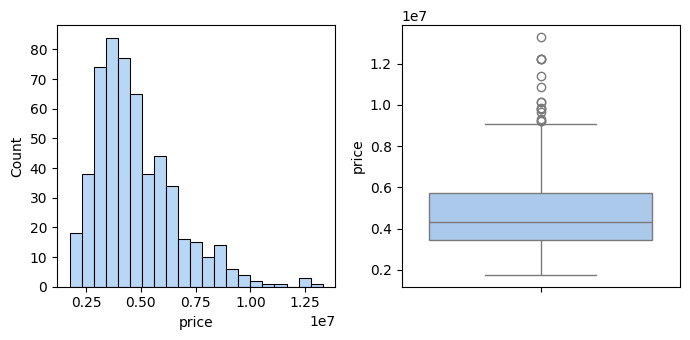

In [17]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='price', ax=axes[0])
sns.boxplot(cleaned_house_price, y='price', ax=axes[1])
plt.show()

The distribution of housing prices appears to be right-skewed, indicating that the majority of house prices in the dataset are moderate, but there are some extremely high prices that pull up the mean.

### Area Distribution

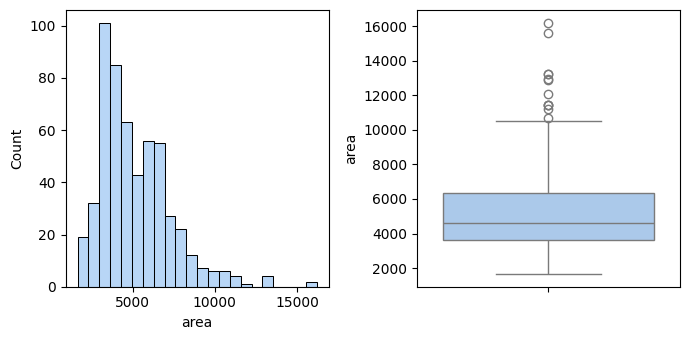

In [18]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='area', ax=axes[0])
sns.boxplot(cleaned_house_price, y='area', ax=axes[1])
plt.show()

The distribution of area appears to be similar to housing prices, also showing a right-skewed distribution.

### The Relationship between Housing Prices and Area

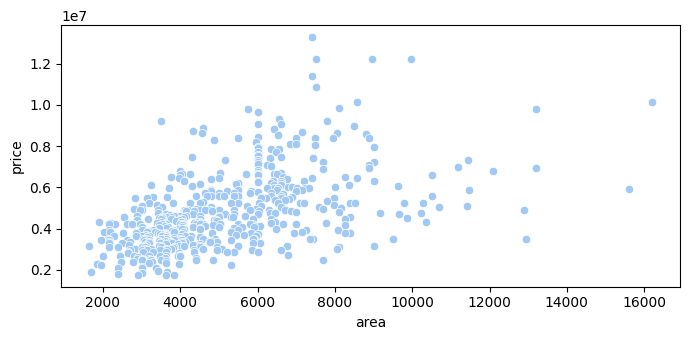

In [19]:
sns.scatterplot(cleaned_house_price, x='area', y='price')
plt.show()

From the scatter plot, there seems to be a general positive correlation, but the strength of the relationship will need to be further assessed through calculating the correlation coefficient.

### The Relationship between Number of Bedrooms and Housing Prices

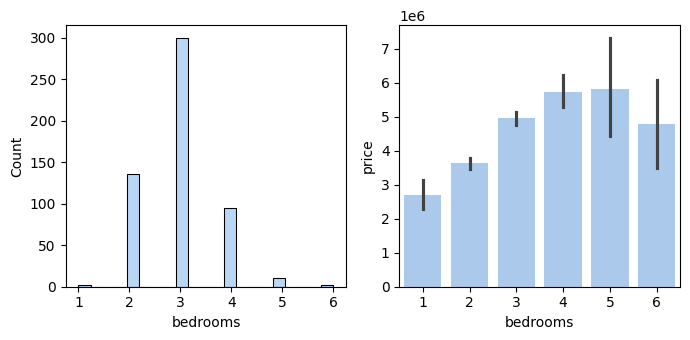

In [20]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='bedrooms', ax=axes[0])
sns.barplot(cleaned_house_price, x='bedrooms', y='price', ax=axes[1])
plt.show()

In this dataset, the number of bedrooms for houses ranges from 1 to 6, with the majority having 2 to 4 bedrooms.

From the bar chart depicting the average housing prices with respect to the number of bedrooms, it appears that for houses with fewer than 5 bedrooms, prices tend to increase with the number of bedrooms. However, once the number of bedrooms exceeds 5, there isn't necessarily a corresponding increase in housing prices.

### The Relationship between the Number of Bathrooms and Housing Prices

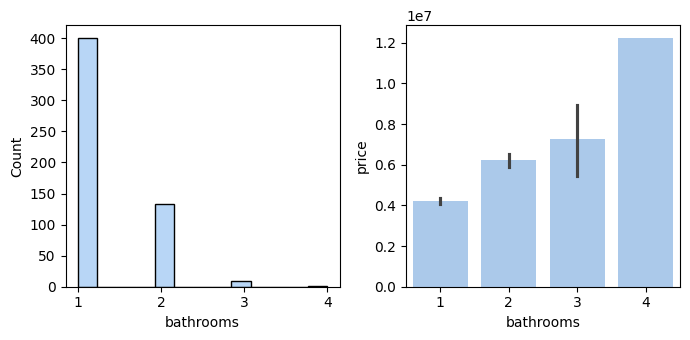

In [21]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='bathrooms', ax=axes[0])
sns.barplot(cleaned_house_price, x='bathrooms', y='price', ax=axes[1])
plt.show()

In this dataset, houses have a minimum of 1 bathroom and a maximum of 4 bathrooms, with the majority having 1 bathroom.

From the bar chart showing the average housing prices with respect to the number of bathrooms, it appears that houses with more bathrooms tend to have higher prices.

### The Relationship between the Number of Stories and Housing Prices

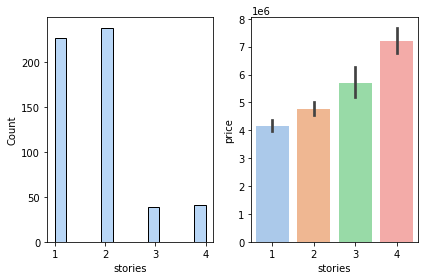

In [22]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='stories', ax=axes[0])
sns.barplot(cleaned_house_price, x='stories', y='price', ax=axes[1])
plt.show()

In this dataset, houses have a number of stories ranging from 1 to 4, with the majority having 1 or 2 stories.

From the bar chart depicting the average housing prices with respect to the number of stories, it seems that houses with more stories generally have higher prices.

### The Relationship between the Number of Garages and Housing Prices

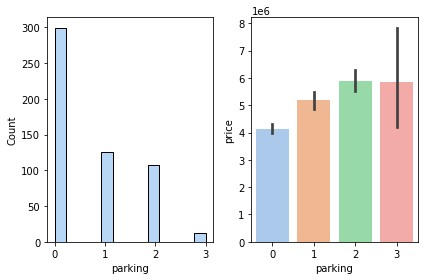

In [23]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='parking', ax=axes[0])
sns.barplot(cleaned_house_price, x='parking', y='price', ax=axes[1])
plt.show()


In this dataset, houses have a number of garages ranging from 0 to 3, with the highest number of houses not having a garage, followed by 1 and 2 garages.

From the bar chart depicting the average housing prices with respect to the number of garages, it seems that houses with more garages generally have higher prices. However, once the number of garages exceeds 2, there isn't necessarily a corresponding increase in housing prices.

### The Relationship between Being on the Main Road and Housing Prices

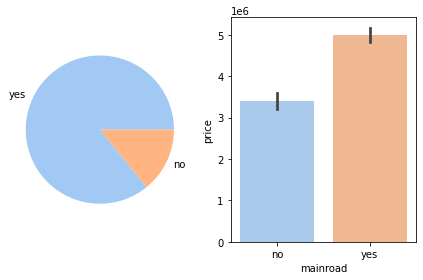

In [24]:
figure, axes = plt.subplots(1, 2)
mainroad_count = cleaned_house_price['mainroad'].value_counts()
mainroad_label = mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(cleaned_house_price, x='mainroad', y='price', ax=axes[1])
plt.show()

In this dataset, the majority of houses are located on the main road.

From the bar chart depicting the average housing prices with respect to being on the main road, it seems that houses on the main road generally have higher prices.

### The Relationship between Having a Guest Room and Housing Prices

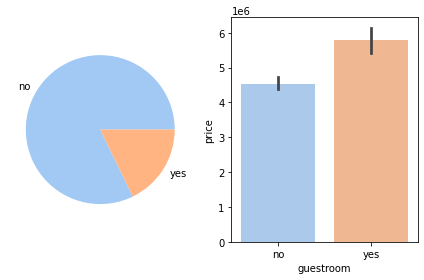

In [25]:
figure, axes = plt.subplots(1, 2)
guestroom_count = cleaned_house_price['guestroom'].value_counts()
guestroom_label = guestroom_count.index
axes[0].pie(guestroom_count, labels=guestroom_label)
sns.barplot(cleaned_house_price, x='guestroom', y='price', ax=axes[1])
plt.show()

In this dataset, the majority of houses do not have a guest room.

From the bar chart depicting the average housing prices with respect to having a guest room, it seems that houses with a guest room generally have higher prices.

### The Relationship between Having a Basement and Housing Prices

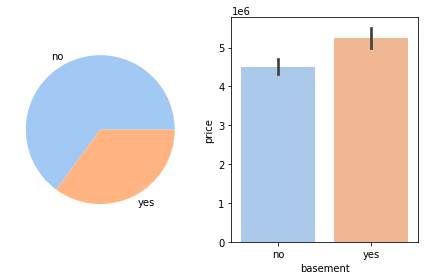

In [26]:
figure, axes = plt.subplots(1, 2)
basement_count = cleaned_house_price['basement'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count, labels=basement_label)
sns.barplot(cleaned_house_price, x='basement', y='price', ax=axes[1])
plt.show()

In this dataset, more houses do not have a basement.

From the bar chart depicting the average housing prices with respect to having a basement, it seems that houses with a basement generally have higher prices.es

### The Relationship between Having Hot Water Heating and Housing Prices

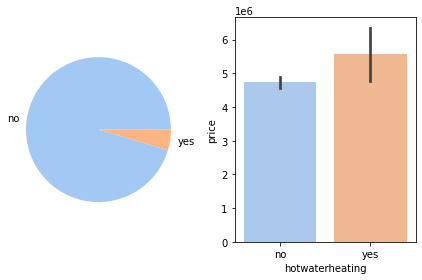

In [27]:
figure, axes = plt.subplots(1, 2)
hotwaterheating_count = cleaned_house_price['hotwaterheating'].value_counts()
hotwaterheating_label = hotwaterheating_count.index
axes[0].pie(hotwaterheating_count, labels=hotwaterheating_label)
sns.barplot(cleaned_house_price, x='hotwaterheating', y='price', ax=axes[1])
plt.show()

In this dataset, the majority of houses do not have a hot water heater.

From the bar chart depicting the average housing prices with respect to having a hot water heater, it seems that houses with a hot water heater generally have higher prices.

### The Relationship between Having Air Conditioning and Housing Prices

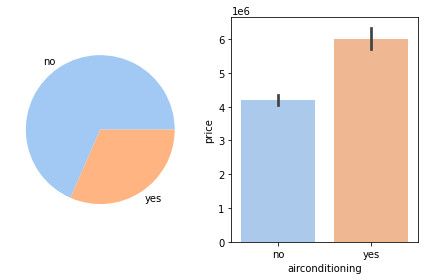

In [28]:
figure, axes = plt.subplots(1, 2)
airconditioning_count = cleaned_house_price['airconditioning'].value_counts()
airconditioning_label = hotwaterheating_count.index
axes[0].pie(airconditioning_count, labels=airconditioning_label)
sns.barplot(cleaned_house_price, x='airconditioning', y='price', ax=axes[1])
plt.show()

In this dataset, more houses do not have air conditioning.

From the bar chart depicting the average housing prices with respect to having air conditioning, it seems that houses with air conditioning generally have higher prices.

### The Relationship between Being in the Preferred Community and Housing Prices

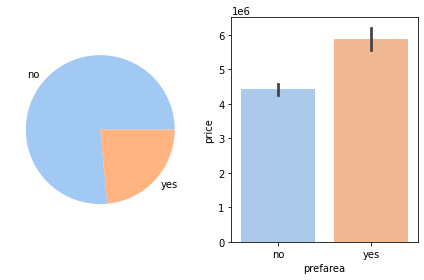

In [29]:
figure, axes = plt.subplots(1, 2)
prefarea_count = cleaned_house_price['prefarea'].value_counts()
prefarea_label = prefarea_count.index
axes[0].pie(prefarea_count, labels=prefarea_label)
sns.barplot(cleaned_house_price, x='prefarea', y='price', ax=axes[1])
plt.show()

In this dataset, the majority of houses are not in the preferred city community.

From the bar chart depicting the average housing prices with respect to being in the preferred city community, it seems that houses in the preferred city community generally have higher prices.

### The Relationship between Furnishing Status and Housing Prices

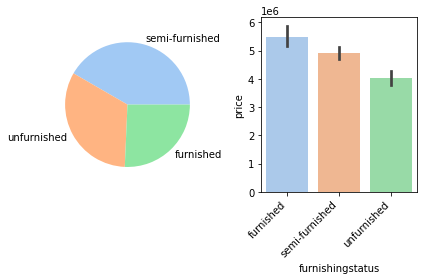

In [30]:
figure, axes = plt.subplots(1, 2)
furnishingstatus_count = cleaned_house_price['furnishingstatus'].value_counts()
furnishingstatus_label = furnishingstatus_count.index
axes[0].pie(furnishingstatus_count, labels=furnishingstatus_label)
sns.barplot(cleaned_house_price, x='furnishingstatus', y='price', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In this dataset, there are more houses with simple or unfurnished furnishings, and around 1/4 of the houses are furnished.

From the bar chart depicting the average housing prices with respect to furnishing status, it seems that furnished houses have higher prices compared to semi-furnished, and semi-furnished houses have higher prices than unfurnished.

## Analyzing the Data

In the analysis step, we will utilize the data from `cleaned_house_price` to perform linear regression analysis with the goal of obtaining a mathematical model that can predict prices based on various attributes of the houses.

Let's start by importing the necessary library for linear regression.n.

In [31]:
import statsmodels.api as sm

We can create a new DataFrame called `lr_house_price`, to serve as the data for our linear regression analysis.

The reason for distinguishing it from `cleaned_house_price` is that we might need to prepare the data before conducting regression analysis, such as introducing dummy variablesThese operations can be performed on `lr_house_price`.e.

In [32]:
lr_house_price = cleaned_house_price.copy()

Since the data contains categorical variables, we cannot directly establish a linear regression model. We need to introduce dummy variables, which means representing each category with 0s and 1s to indicate its presence or absence.

In [33]:
lr_house_price = pd.get_dummies(lr_house_price, drop_first=True, columns=['mainroad', 'guestroom',
                                                         'basement', 'hotwaterheating',
                                                         'airconditioning','prefarea', 
                                                         'furnishingstatus'], dtype=int)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


Next, we need to separate the dependent variable from the independent variables. The dependent variable is `price` because our goal in linear regression is to build a model that predicts the selling price based on other variables that may influence housing prices.

In [34]:
y = lr_house_price['price']

We can include all variables except `price` as independent variables, but we need to check their correlations. If some variables have high correlations, it may lead to multicollinearity.

In [35]:
X = lr_house_price.drop('price', axis=1)

As a general rule, a correlation coefficient with an absolute value greater than 0.8 may indicate serious multicollinearity. Therefore, during our check, we need to identify values with an absolute correlation greater than 0.8.

In [36]:
X.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


From the above output, it seems that the absolute values of the correlation coefficients between different variables are all less than or equal to 0.8.

Next, let's add an intercept to the linear equation of the model.

In [37]:
X = sm.add_constant(X)
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


The next step is to call the OLS function, using the method of least squares to obtain the parameter values for the linear regression model.

In [38]:
model = sm.OLS(y, X).fit()

To examine the model results, we use the `summary` method to obtain a summary of information.

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          9.07e-123
Time:                        21:30:29   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we set the significance level to 0.05, looking at the p-values in the above results, the model suggests that the following factors do not have a significant impact on housing prices: the number of bedrooms and whether the house is semi-furnished. Additionally, the p-value for the constant term (representing the intercept of the linear equation) is large, indicating that it also has no significant impact.

Weou can consider removing these variables and building the linear regression model again.

In [40]:
X = X.drop(['const', 'bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

In [41]:
model = sm.OLS(y, X).fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):                        0.00
Time:                        21:30:29   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After removing the variables with high p-values from the linear regression model, the R-squared value increases from 0.682 to 0.957, indicating an improvement in the model's fit to the existing data.

Examining the coefficients of each independent variable in the linear regression equation, the model predicts that an increase (or presence) in the following factors will significantly increase housing prices: house area, number of bathrooms, number of stories, garage capacity, being on the main road, having a guest room, having a basement, having a water heater, having air conditioning, and being in the preferred city community.

On the other hand, the model predicts that an increase (or presence) in the following factors will significantly decrease housing prices: houses without furnishing or being unfurnished.

To predict the price of a house with the following information:

- Area: 6500 square feet
- Bedrooms: 4
- Bathrooms: 2
- Stories: 2
- Mainroad: No
- Guestroom: No
- Basement: Yes
- Hot water heating: Yes
- Air conditioning: No
- Parking: 2
- Preferred area: Yes
- Furnishing status: Semi-furnished

In [44]:
price_to_predict = pd.DataFrame({'area': [5600], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


We need to convert the data type of categorical variables to "Category" and use the `categories` parameter to inform the program about all possible categorical values. The reason for doing this is that the predictive data may not include all possible categories. We want to ensure that when introducing dummy variables, no categories are omitted.

In [45]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['no', 'yes'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['no', 'yes'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['no', 'yes'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['no', 'yes'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['no', 'yes'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['no', 'yes'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

Next, introduce dummy variables for categorical variables.

In [46]:
price_to_predict = pd.get_dummies(price_to_predict, drop_first=True, 
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea', 
                                           'furnishingstatus'], dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,0,1,1,0,1,1,0


In [47]:
price_to_predict = price_to_predict.drop(['bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

After that, we can call the predict method of the linear regression model to obtain the predicted price.

In [48]:
predicted_value = model.predict(price_to_predict)
predicted_value

0    7.071927e+06
dtype: float64

The predicted price from the linear regression model is 7,071,927.